In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Reading files
path = '/Users/irina/Desktop/Brazilian_E-Commerce_by_Olist/'
files = ['orders', 'order_items', 'products', 'product_category_name_translation', 'sellers', 'customers']
for file in files:
    file_path = path + file + '.csv' 
    globals()[file] = pd.read_csv(file_path)

In [4]:
# Merging tables
merged = pd.merge(order_items, orders, how = 'left', left_on = 'order_id', right_on = 'order_id' )
merged = pd.merge(merged, products, how = 'left', left_on = 'product_id', right_on = 'product_id')
merged = pd.merge(merged, product_category_name_translation, how = 'left', left_on = 'product_category_name', right_on = 'product_category_name')
merged = pd.merge(merged, sellers, how = 'left', left_on = 'seller_id', right_on = 'seller_id')
merged = pd.merge(merged, customers, how = 'left', left_on = 'customer_id', right_on = 'customer_id')
# Leaving the necessary columns
data = merged[['order_id', 'product_id', 'seller_id', 'price', 'freight_value', 'customer_unique_id',
               'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date',
               'order_estimated_delivery_date', 'product_category_name_english','product_weight_g',
               'seller_city', 'seller_state', 'customer_city', 'customer_state']]
# Formatting date columns
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp']).dt.date
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date']).dt.date
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date']).dt.date

In [5]:
data.head()

,order_id,product_id,seller_id,price,freight_value,customer_unique_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,product_weight_g,seller_city,seller_state,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13,2017-09-20,2017-09-29,cool_stuff,650.0,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26,2017-05-12,2017-05-15,pet_shop,30000.0,sao paulo,SP,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14,2018-01-22,2018-02-05,furniture_decor,3050.0,borda da mata,MG,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08,2018-08-14,2018-08-20,perfumery,200.0,franca,SP,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,delivered,2017-02-04,2017-03-01,2017-03-17,garden_tools,3750.0,loanda,PR,varzea paulista,SP


## Sellers with the biggest/smallest turnover

In [6]:
# Creating a table with sellers turnovers
seller_turnover = data.groupby('seller_id')['price'].sum()
seller_turnover = seller_turnover.to_frame(name='turnover').reset_index()
seller_turnover = seller_turnover.sort_values( 'turnover', ascending = False )

In [7]:
seller_turnover

,seller_id,turnover
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1013,53243585a1d6dc2643021fd1853d8905,222776.05
881,4a3ca9315b744ce9f8e9374361493884,200472.92
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89
...,...,...
627,34aefe746cd81b7f3b23253ea28bef39,8.00
1370,702835e4b785b67a084280efca355756,7.60
373,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
1465,77128dec4bec4878c37ab7d6169d6f26,6.50


In [8]:
# Finding sellers with the biggest/smallest turnover
seller_max_turnover = seller_turnover[seller_turnover['turnover'] == seller_turnover['turnover'].max()].iloc[0, 0]
seller_min_turnover = seller_turnover[seller_turnover['turnover'] == seller_turnover['turnover'].min()].iloc[0, 0]

print(f"Seller with the biggest turnover: {seller_max_turnover}")
print(f"\nSeller with the smallest turnover: {seller_min_turnover}")

Seller with the biggest turnover: 4869f7a5dfa277a7dca6462dcf3b52b2

Seller with the smallest turnover: cf6f6bc4df3999b9c6440f124fb2f687


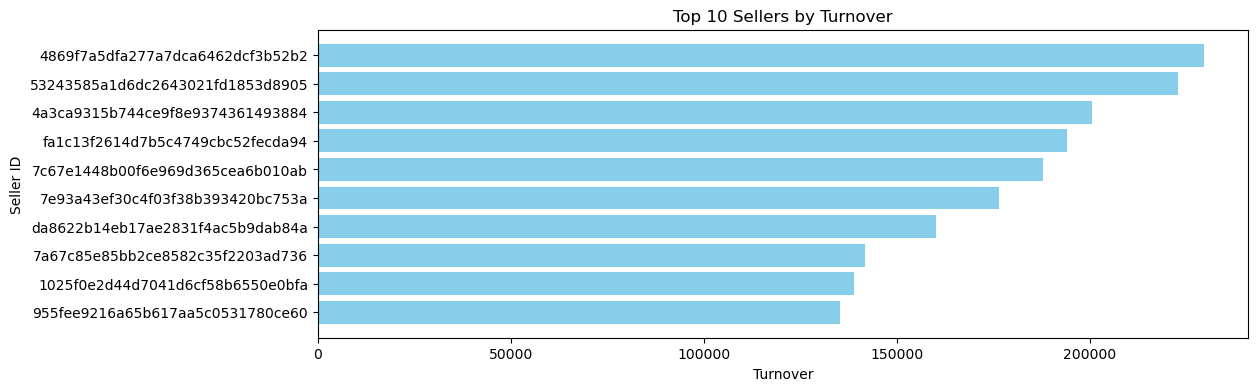

In [9]:
top_sellers = seller_turnover.head(10)
# Plotting top 10 sellers
plt.figure(figsize=(12, 4))
plt.barh(top_sellers['seller_id'], top_sellers['turnover'], color='skyblue')
plt.xlabel('Turnover')
plt.ylabel('Seller ID')
plt.title('Top 10 Sellers by Turnover')
plt.gca().invert_yaxis()
plt.show()

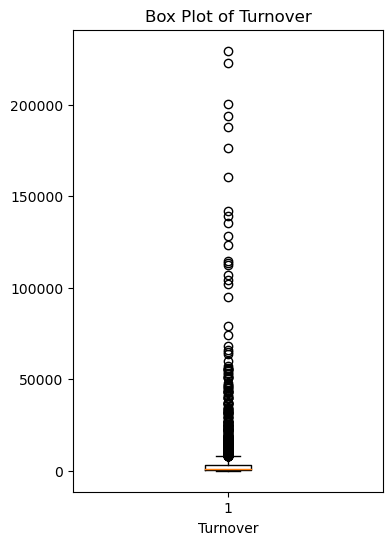

In [10]:
# Plotting boxplot of turnover
plt.figure(figsize=(4, 6))
plt.boxplot(seller_turnover['turnover'])
plt.xlabel('Turnover')
plt.title('Box Plot of Turnover')
plt.show()

In [11]:
# Calculating statistics
total_turnover = seller_turnover['turnover'].sum()
top_seller_turnover = seller_turnover['turnover'].max()
percentage = (top_seller_turnover / total_turnover) * 100
mean_turnover = seller_turnover['turnover'].mean()
mode_turnover = seller_turnover['turnover'].mode()

print(f"Mean Turnover: {mean_turnover}")
print(f"Mode Turnover: {mode_turnover.iloc[0]}") 
print(f"Total turnover for all sellers: {total_turnover}")
print(f"The top seller represents {percentage:.2f}% of the total turnover.")

Mean Turnover: 4391.48423263328
Mode Turnover: 29.9
Total turnover for all sellers: 13591643.700000001
The top seller represents 1.69% of the total turnover.


Most of the sellers have relatively low turnover - 29.9, top seller gets just 1.69% of the total turnover. Box plot confirms that most sellers have a very small market share, which is good for the market, giving customers opportunity to choose, and giving opportunity for new sellers to enter the market easier.

## Leaders/outsiders in sales in each state

In [12]:
# Adding states to the table with sellers turnovers
seller_turnover_state = pd.merge(seller_turnover, sellers[['seller_id', 'seller_state']], how = 'left', 
                                 left_on = 'seller_id', right_on = 'seller_id')

In [13]:
seller_turnover_state

,seller_id,turnover,seller_state
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,SP
1,53243585a1d6dc2643021fd1853d8905,222776.05,BA
2,4a3ca9315b744ce9f8e9374361493884,200472.92,SP
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03,SP
4,7c67e1448b00f6e969d365cea6b010ab,187923.89,SP
...,...,...,...
3090,34aefe746cd81b7f3b23253ea28bef39,8.00,PR
3091,702835e4b785b67a084280efca355756,7.60,MG
3092,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,SP
3093,77128dec4bec4878c37ab7d6169d6f26,6.50,SP


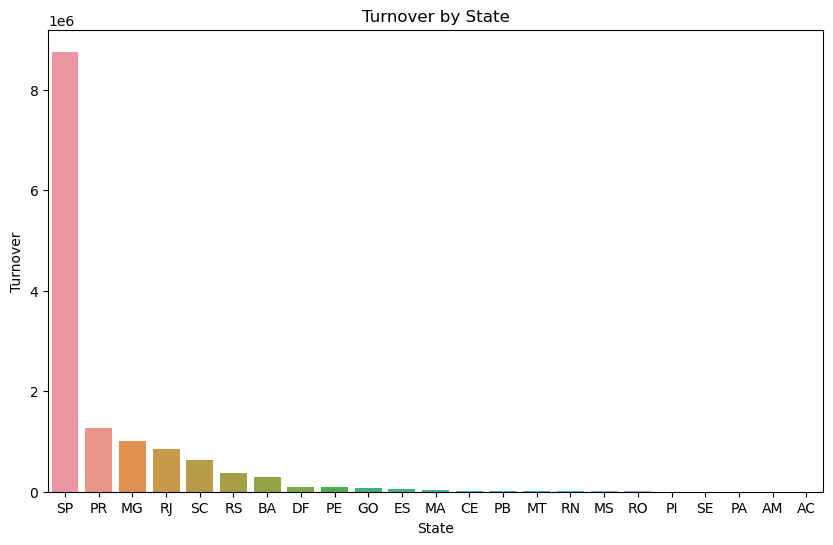

In [14]:
# Plotting turnover distribution by state
state_grouped = seller_turnover_state.groupby('seller_state')['turnover'].sum().reset_index()
sorted_state_grouped = state_grouped.sort_values(by='turnover', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='seller_state', y='turnover', data=sorted_state_grouped, estimator=sum)
plt.title('Turnover by State')
plt.xlabel('State')
plt.ylabel('Turnover')
plt.show()

In [15]:
# Calculating the percentage of sellers in the SP state
sellers_in_sp = seller_turnover_state[seller_turnover_state['seller_state'] == 'SP'].shape[0]
total_sellers = seller_turnover_state.shape[0]
percentage_in_sp = (sellers_in_sp / total_sellers) * 100
print(f"The percentage of sellers in the 'SP' state: {percentage_in_sp:.2f}%")

The percentage of sellers in the 'SP' state: 59.74%


São Paulo state is an absolute leader in sales, 59.74% of the sellers are located there.

In [16]:
# Finding the number of sellers for each state
sellers_per_state = seller_turnover_state['seller_state'].value_counts().reset_index()
sellers_per_state.columns = ['seller_state', 'num_sellers']
print(sellers_per_state)

   seller_state  num_sellers
0            SP         1849
1            PR          349
2            MG          244
3            SC          190
4            RJ          171
5            RS          129
6            GO           40
7            DF           30
8            ES           23
9            BA           19
10           CE           13
11           PE            9
12           PB            6
13           RN            5
14           MS            5
15           MT            4
16           RO            2
17           SE            2
18           MA            1
19           PI            1
20           PA            1
21           AM            1
22           AC            1


In some states there are very few sellers, there is no need in finding top/last sellers in all states.

In [17]:
# Creating the new DataFrame with top sellers for top states
def top_seller_per_state(df):
    # Sorting data by turnover in descending order
    sorted_df = df.sort_values(by='turnover', ascending=False)
    # Groupping by state and getting the first row (top seller) for each state
    top_sellers_df = sorted_df.groupby('seller_state').first().reset_index()
    top_states = ['SP', 'PR', 'MG', 'SC', 'RJ', 'RS']
    top_sellers_df = top_sellers_df[top_sellers_df['seller_state'].isin(top_states)]
    return top_sellers_df
top_seller_per_state_df = top_seller_per_state(seller_turnover_state)
print('Top sellers per state')
print(top_seller_per_state_df)

Top sellers per state
   seller_state                         seller_id   turnover
8            MG  a1043bafd471dff536d0c462352beb48  101901.16
15           PR  ccc4bbb5f32a6ab2b7066a4130f114e3   74004.62
16           RJ  46dc3b2cc0980fb8ec44634e21d2718e  128111.19
19           RS  87142160b41353c4e5fca2360caf6f92   31095.98
20           SC  04308b1ee57b6625f47df1d56f00eedf   60130.60
22           SP  4869f7a5dfa277a7dca6462dcf3b52b2  229472.63


In [18]:
# Creating the new DataFrame with smallest sellers for top states
def smallest_seller_per_state(df):
    # Sorting data by turnover in ascending order
    sorted_df = df.sort_values(by='turnover', ascending=True)
    # Groupping by state and getting the first row (top seller) for each state
    smallest_sellers_df = sorted_df.groupby('seller_state').first().reset_index()
    top_states = ['SP', 'PR', 'MG', 'SC', 'RJ', 'RS']
    smallest_sellers_df = smallest_sellers_df[smallest_sellers_df['seller_state'].isin(top_states)]
    return smallest_sellers_df
smallest_seller_per_state_df = smallest_seller_per_state(seller_turnover_state)
print('Smallest sellers per state')
print(smallest_seller_per_state_df)

Smallest sellers per state
   seller_state                         seller_id  turnover
8            MG  702835e4b785b67a084280efca355756      7.60
15           PR  34aefe746cd81b7f3b23253ea28bef39      8.00
16           RJ  c18309219e789960add0b2255ca4b091      9.90
19           RS  fb503a924a0b9db19d83dd0ac6dbef8c     13.90
20           SC  ad14615bdd492b01b0d97922e87cb87f      8.25
22           SP  cf6f6bc4df3999b9c6440f124fb2f687      3.50


## Best-selling products in each category

In [19]:
# Creating table with date, product_category, quantity columns
product_data = data[['product_id', 'product_category_name_english']]
product_data.columns = ['product_id', 'product_category']
product_data = product_data.groupby(['product_id', 'product_category']).size().reset_index(name='quantity')

In [20]:
product_data

,product_id,product_category,quantity
0,00066f42aeeb9f3007548bb9d3f33c38,perfumery,1
1,00088930e925c41fd95ebfe695fd2655,auto,1
2,0009406fd7479715e4bef61dd91f2462,bed_bath_table,1
3,000b8f95fcb9e0096488278317764d19,housewares,2
4,000d9be29b5207b54e86aa1b1ac54872,watches_gifts,1
...,...,...,...
32336,fff6177642830a9a94a0f2cba5e476d1,cool_stuff,2
32337,fff81cc3158d2725c0655ab9ba0f712c,health_beauty,1
32338,fff9553ac224cec9d15d49f5a263411f,fashion_bags_accessories,1
32339,fffdb2d0ec8d6a61f0a0a0db3f25b441,computers_accessories,5


In [21]:
# Finding best-selling product in each category
best_selling_products = product_data.groupby('product_category').apply(lambda x: x.nlargest(1, 'quantity')).reset_index(drop=True)

# Calculating total quantity sold for each product category
total_quantity_per_category = product_data.groupby('product_category')['quantity'].sum()

# Addding percentage column to best_selling_products DataFrame
best_selling_products['percentage_of_total'] = best_selling_products.apply(
    lambda row: (row['quantity'] / total_quantity_per_category[row['product_category']]) * 100,
    axis=1)

best_selling_products = best_selling_products.sort_values('percentage_of_total', ascending = False)
best_selling_products.head(10)

,product_id,product_category,quantity,percentage_of_total
11,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicals,14,100.000000
47,ec5b3c8bb77ad22278f6e9d719a83de3,home_comfort_2,26,86.666667
41,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery,22,57.894737
42,0105b5323d24fc655f73052694dbbb3a,gaming_pc,5,55.555556
2,4fe644d766c7566dbc46fb851363cb3b,art,107,51.196172
63,6c7a0a349ad11817745e3ad58abd5c79,security_and_services,1,50.000000
69,6bbe55cf8f85c87b6eebb775a53402f4,tablets_printing_image,33,39.759036
48,35afc973633aaeb6b877ff57b2793310,home_confort,165,38.018433
29,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes,3,37.500000
23,3fdb534dccf5bc9ab0406944b913787d,diapers_and_hygiene,14,35.897436


In cds_dvds_musicals category there is only one product selling. Some of products has more then 50% of sales in their categories, making them leaders in their categories.

## Comparison of the estimated delivery date and the real delivery date

In [24]:
# Creating a table with date data 
data_dt = data[['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
data_dt['order_delivered_customer_date'] = pd.to_datetime(data_dt['order_delivered_customer_date'])
data_dt['order_estimated_delivery_date'] = pd.to_datetime(data_dt['order_estimated_delivery_date'])
data_dt = data_dt.dropna()
data_dt = data_dt.drop_duplicates()

In [25]:
data_dt.head()

,order_id,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-20,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,2017-05-12,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,2018-01-22,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,2018-08-14,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-03-01,2017-03-17


In [26]:
# Calculating difference between estimated delivery date and the real delivery date
data_dt['delivery_difference_days'] = (data_dt['order_estimated_delivery_date'] - data_dt['order_delivered_customer_date']).dt.days


In [27]:
# Dividing and labeling deadlines into 5 categories of delivery terms 
def term(row):
        if row['delivery_difference_days'] > 7:
            return 'more than a week late'
        elif 7 >= row['delivery_difference_days'] > 0:
            return 'less than a week late'
        elif -7 <= row['delivery_difference_days'] < 0:
            return 'less than a week earlier'
        elif  row['delivery_difference_days'] < -7:
            return 'more than a week earlier'
        else: 
            return 'in time'
data_dt['term'] = data_dt.apply(term, axis = 1 )

In [28]:
data_dt.head()

,order_id,order_delivered_customer_date,order_estimated_delivery_date,delivery_difference_days,term
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-20,2017-09-29,9,more than a week late
1,00018f77f2f0320c557190d7a144bdd3,2017-05-12,2017-05-15,3,less than a week late
2,000229ec398224ef6ca0657da4fc703e,2018-01-22,2018-02-05,14,more than a week late
3,00024acbcdf0a6daa1e931b038114c75,2018-08-14,2018-08-20,6,less than a week late
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-03-01,2017-03-17,16,more than a week late


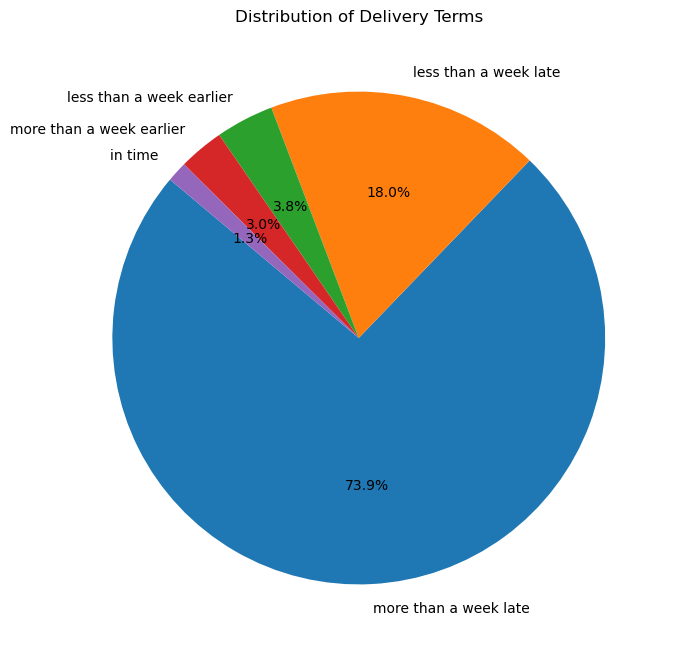

In [29]:
# Plotting delivery terms in a pie chart
term_counts = data_dt['term'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Delivery Terms')
plt.show()

More then 92% of the orders are delidered after the estimated delivery date. In general, the delivery date was estimated correctly only for 1.3% of the orders, which shows, that estimation system for delivery dates should be improved.

## Segmentation of products

In [30]:
products_seg = products.dropna()

In [31]:
products_seg = products_seg.reset_index()

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [33]:
# Encoding the product category
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(products_seg[['product_category_name']])

In [34]:
feature_names = encoder.get_feature_names_out(['product_category_name'])

In [36]:
# Concatenating the encoded categories with the product DataFrame
category_df = pd.DataFrame(category_encoded.toarray(), columns=encoder.get_feature_names_out(['product_category_name']))
products_encoded = pd.concat([products_seg, category_df], axis=1)

In [37]:
X = products_encoded.drop(columns=['product_id', 'product_category_name'])

In [38]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [40]:
# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

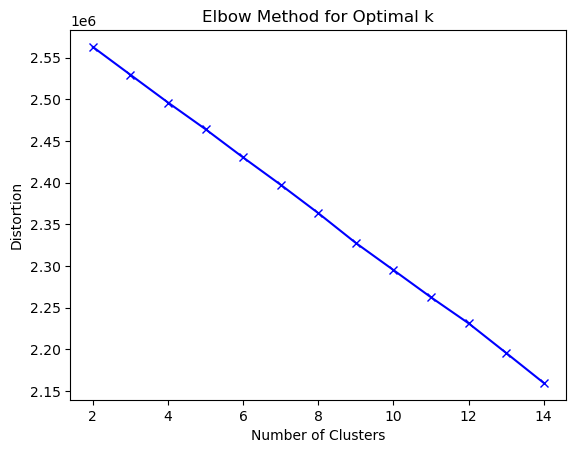

In [41]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

Inertia graph doesn't form an "elbow" on any number of clusters. Let's try to use t-SNE to probably see clusters.

In [42]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

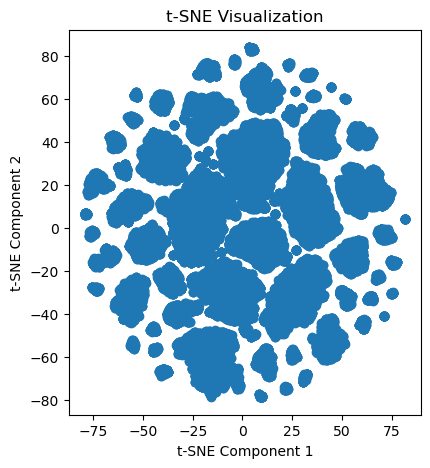

In [43]:
# Plot t-SNE visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Looks like there are no clearly separable clusters, it’s impossible to do high-quality segmentation, there will be no point in the segmentation.